# Diabetes

# STEP 2 - Improve Model SVM

Mencari Algoritma yang cocok untuk problem yang akan di selesaikan

In [1]:
# lib standart
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Untuk split data
from sklearn.model_selection import train_test_split

# Untuk Algoritma ML yang akan di pakai
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# untuk impute nilai kosong
from sklearn.impute import SimpleImputer

# untuk scale data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures

# untuk one hot data kategorik
from sklearn.preprocessing import OneHotEncoder

# untuk PCA
from sklearn.decomposition import PCA

# untuk membangun pipeline ML
from sklearn.pipeline import Pipeline

# bagian dari pipe line untuk handling kolom 
from sklearn.compose import ColumnTransformer

# untuk tuning hyperparameter
from sklearn.model_selection import GridSearchCV

# menghitung nilai f1
from sklearn.metrics import f1_score , precision_score, recall_score, accuracy_score, classification_report

# menyimpan model
import pickle

# remove outlier
from scipy import stats

https://towardsdatascience.com/workflow-of-a-machine-learning-project-ec1dba419b94

In [2]:
df = pd.read_csv("diabetes.csv")
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data = data.replace(0, np.nan)
data['Outcome'] = data['Outcome'].fillna(0) 

In [5]:
corre = data.corr().sort_values('Outcome', ascending=False)[['Outcome']]
corre

,Outcome
Outcome,1.000000
Glucose,0.494650
BMI,0.313680
Insulin,0.303454
Pregnancies,0.268218
SkinThickness,0.259491
Age,0.238356
DiabetesPedigreeFunction,0.173844
BloodPressure,0.170589


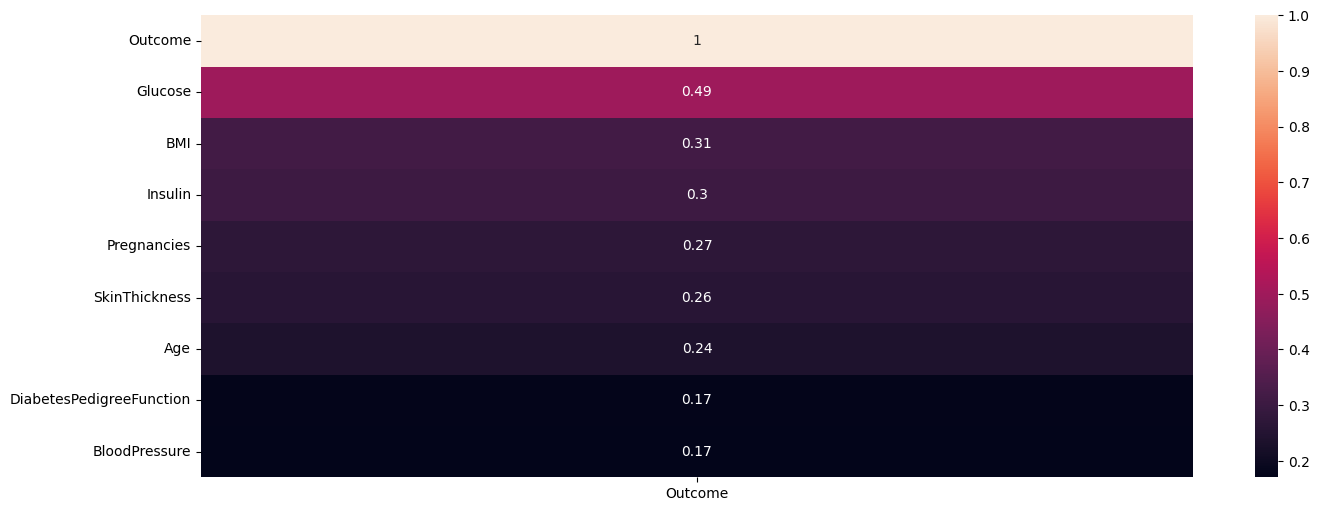

In [6]:
plt.figure(figsize=(16,6))
sns.heatmap(data=corre, annot=True)
plt.show()

In [7]:
data.shape

(768, 9)

In [8]:
data.isnull().sum() / data.shape[0]

Pregnancies                 0.144531
Glucose                     0.006510
BloodPressure               0.045573
SkinThickness               0.295573
Insulin                     0.486979
BMI                         0.014323
DiabetesPedigreeFunction    0.000000
Age                         0.000000
Outcome                     0.000000
dtype: float64

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,657.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,4.494673,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.217291,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,4.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,7.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
pd.crosstab(data.Outcome, data.Outcome)

Outcome,0.0,1.0
Outcome,,
0.0,500,0
1.0,0,268


In [11]:
268 / ( 268 + 500 ) , 500 / ( 268 + 500 ) 

(0.3489583333333333, 0.6510416666666666)

# Train-Test split

In [12]:
X = data.drop(['Outcome'], axis=1)
y = data['Outcome']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 4)

# Featuring Engginering dan Pipeline

In [15]:
# numerical_pipeline

numerical_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy = 'mean')),
        ('poli', PolynomialFeatures(2)),
        ('scaler', RobustScaler()),
        ('pca', PCA(n_components = 6 , whiten = True))
    ])

In [16]:
# preprocessor

list_numeric = [
                'Glucose', 
                'BMI',     
                'Insulin', 
                'Pregnancies', 
                'SkinThickness', 
                'Age',
                'DiabetesPedigreeFunction', 
                'BloodPressure', 

            ]


preprocessor = ColumnTransformer([
        ('numeric', numerical_pipeline, list_numeric)])

# Trainning

# SVM Classifier

In [17]:
model_SVC = Pipeline([
        ('preprocessor', preprocessor),
        ('algoritma', SVC(probability=True))
    ])

# GridSearchCV

In [18]:
parameter = {
    'algoritma__C'      : [0.01 , 0.1, 1],
    'algoritma__gamma'  : [0.01 , 0.1, 1],
    'algoritma__kernel' : ['linear','sigmoid','rbf'],
    'algoritma__class_weight' : [ {0 : x, 1 : 1-x} for x in [0.1, 0.2, 0.3] ]   
}

model = GridSearchCV(model_SVC, parameter, cv = 5, scoring = 'f1')

In [19]:
%%time
model.fit(X_train, y_train)

CPU times: total: 9.23 s
Wall time: 24.4 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('poli',
                                                                                          PolynomialFeatures()),
                                                                                         ('scaler',
                                                                                          RobustScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components=6,
                                                                                              whiten=True))]),
                                                                         ['Glucose',
                                                                          'BMI',
                                                                          'Insulin',
                                                                          'Pregnancies',
                                                                          'SkinThickness',
                                                                          'Age',
                                                                          'DiabetesPedigreeFunction',
                                                                          'BloodPressure'])])),
                                       ('algoritma', SVC(probability=True))]),
             param_grid={'algoritma__C': [0.01, 0.1, 1],
                         'algoritma__class_weight': [{0: 0.1, 1: 0.9},
                                                     {0: 0.2, 1: 0.8},
                                                     {0: 0.3, 1: 0.7}],
                         'algoritma__gamma': [0.01, 0.1, 1],
                         'algoritma__kernel': ['linear', 'sigmoid', 'rbf']},
             scoring='f1')

In [20]:
model.best_params_

{'algoritma__C': 1,
 'algoritma__class_weight': {0: 0.3, 1: 0.7},
 'algoritma__gamma': 0.1,
 'algoritma__kernel': 'rbf'}

In [32]:
pd.DataFrame(model.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritma__C,param_algoritma__class_weight,param_algoritma__gamma,param_algoritma__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
77,0.057778,0.012319,0.007078,0.003793,1,"{0: 0.3, 1: 0.7}",0.1,rbf,"{'algoritma__C': 1, 'algoritma__class_weight':...",0.653846,0.693878,0.653061,0.666667,0.638298,0.661150,0.018668,1
45,0.032764,0.004458,0.003529,0.003006,0.1,"{0: 0.3, 1: 0.7}",0.01,linear,"{'algoritma__C': 0.1, 'algoritma__class_weight...",0.673913,0.697674,0.652632,0.674419,0.597701,0.659268,0.033922,2
48,0.030890,0.001456,0.005084,0.004257,0.1,"{0: 0.3, 1: 0.7}",0.1,linear,"{'algoritma__C': 0.1, 'algoritma__class_weight...",0.673913,0.697674,0.652632,0.674419,0.597701,0.659268,0.033922,2
51,0.039558,0.012190,0.004603,0.003860,0.1,"{0: 0.3, 1: 0.7}",1,linear,"{'algoritma__C': 0.1, 'algoritma__class_weight...",0.673913,0.697674,0.652632,0.674419,0.597701,0.659268,0.033922,2
76,0.044923,0.002996,0.005148,0.003309,1,"{0: 0.3, 1: 0.7}",0.1,sigmoid,"{'algoritma__C': 1, 'algoritma__class_weight':...",0.645161,0.638298,0.666667,0.689655,0.635294,0.655015,0.020500,5


In [22]:
pd.DataFrame(model.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algoritma__C,param_algoritma__class_weight,param_algoritma__gamma,param_algoritma__kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
77,0.057778,0.012319,0.007078,0.003793,1,"{0: 0.3, 1: 0.7}",0.1,rbf,"{'algoritma__C': 1, 'algoritma__class_weight':...",0.653846,0.693878,0.653061,0.666667,0.638298,0.661150,0.018668,1
45,0.032764,0.004458,0.003529,0.003006,0.1,"{0: 0.3, 1: 0.7}",0.01,linear,"{'algoritma__C': 0.1, 'algoritma__class_weight...",0.673913,0.697674,0.652632,0.674419,0.597701,0.659268,0.033922,2
48,0.030890,0.001456,0.005084,0.004257,0.1,"{0: 0.3, 1: 0.7}",0.1,linear,"{'algoritma__C': 0.1, 'algoritma__class_weight...",0.673913,0.697674,0.652632,0.674419,0.597701,0.659268,0.033922,2
51,0.039558,0.012190,0.004603,0.003860,0.1,"{0: 0.3, 1: 0.7}",1,linear,"{'algoritma__C': 0.1, 'algoritma__class_weight...",0.673913,0.697674,0.652632,0.674419,0.597701,0.659268,0.033922,2
76,0.044923,0.002996,0.005148,0.003309,1,"{0: 0.3, 1: 0.7}",0.1,sigmoid,"{'algoritma__C': 1, 'algoritma__class_weight':...",0.645161,0.638298,0.666667,0.689655,0.635294,0.655015,0.020500,5


In [33]:
filename = 'SVM_Model.sav'
pickle.dump(model, open(filename, 'wb'))

# Matrix Confusion

# All Data

In [29]:
y_pred_svm      = model.predict(X)

df_pred = pd.DataFrame()
df_pred['y_test'] = y
df_pred['y_pred_svm'] = y_pred_svm

print(classification_report(y, y_pred_svm))

              precision    recall  f1-score   support

         0.0       0.90      0.62      0.73       500
         1.0       0.55      0.87      0.67       268

    accuracy                           0.71       768
   macro avg       0.72      0.74      0.70       768
weighted avg       0.78      0.71      0.71       768



# Train Data

In [30]:
y_pred_svm_train      = model.predict(X_train)

df_pred = pd.DataFrame()
df_pred['y_test'] = y_train
df_pred['y_pred_svm_train'] = y_pred_svm_train

print(classification_report(y_train, y_pred_svm_train))

              precision    recall  f1-score   support

         0.0       0.89      0.63      0.74       348
         1.0       0.56      0.86      0.68       189

    accuracy                           0.71       537
   macro avg       0.72      0.74      0.71       537
weighted avg       0.77      0.71      0.72       537



# Test Data

In [31]:
y_pred_svm_test      = model.predict(X_test)

df_pred = pd.DataFrame()
df_pred['y_test'] = y_test
df_pred['y_pred_svm_test '] = y_pred_svm_test 

print(classification_report(y_test, y_pred_svm_test))

              precision    recall  f1-score   support

         0.0       0.90      0.61      0.72       152
         1.0       0.53      0.87      0.66        79

    accuracy                           0.70       231
   macro avg       0.72      0.74      0.69       231
weighted avg       0.78      0.70      0.70       231



# ROC and AUC

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

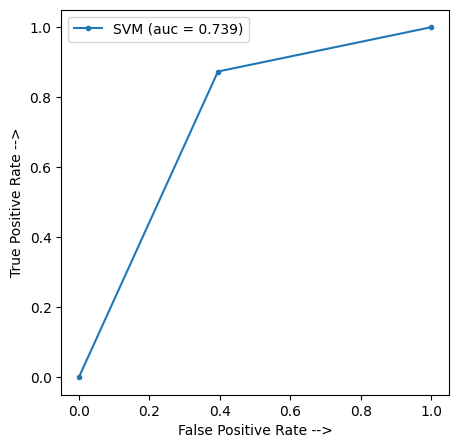

In [27]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(5, 5), dpi=100)

# SVM
svm_fpr, svm_tpr, threshold = roc_curve(y_test, y_pred_svm)
auc_svm = auc(svm_fpr, svm_tpr)

plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (auc = %0.3f)' % auc_svm)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()